In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Step:01 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/churn-for-bank-customers/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Step-02: Check Dataset

In [3]:
# checking shape of dataset
df.shape

(10000, 14)

In [4]:
#checking null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# checking distribution of numerical columns(int , float)
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Step-03:EDA(Exploratory Data Analysis)

In [10]:
# first check unique countries
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<Axes: title={'center': 'Number of People Churned By Country'}, xlabel='Geography', ylabel='Exited'>

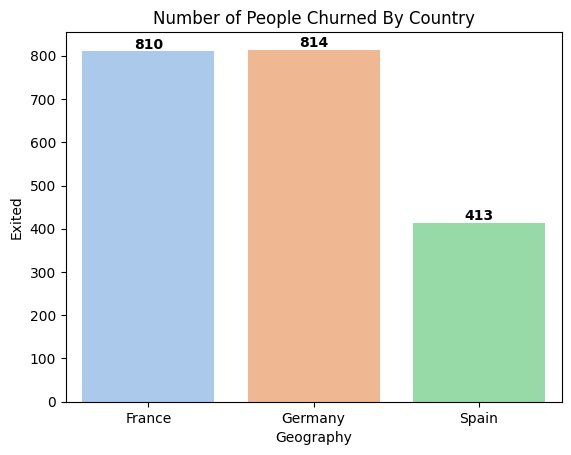

In [16]:
# there are 3 countries i.e France,Spain,Germany
# verifying number of people churned per geographic region
df_temp = df[df['Exited']==1]
people_by_geography = df_temp.groupby('Geography')['Exited'].count().reset_index()
ax = sns.barplot(x='Geography',y='Exited',data=people_by_geography,palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontweight='bold')
plt.title('Number of People Churned By Country')
ax

<Axes: title={'center': 'Number of People Churned By NumOfProducts'}, xlabel='NumOfProducts', ylabel='Exited'>

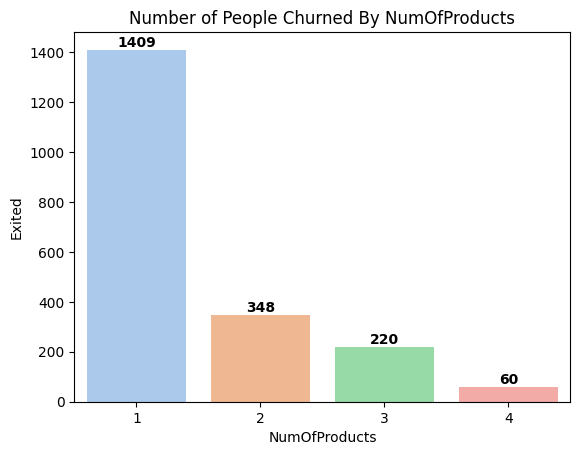

In [20]:
# germany has highest churn 814 followed by france 810 then spain 413
# Number of Products vs Exited
df_temp = df[df['Exited']==1]
people_by_geography = df_temp.groupby('NumOfProducts')['Exited'].count().reset_index()
ax = sns.barplot(x='NumOfProducts',y='Exited',data=people_by_geography,palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontweight='bold')
plt.title('Number of People Churned By NumOfProducts')
ax

<Axes: title={'center': 'Number of People Churned By Have Credit Card (Yes/no)'}, xlabel='HasCrCard', ylabel='Exited'>

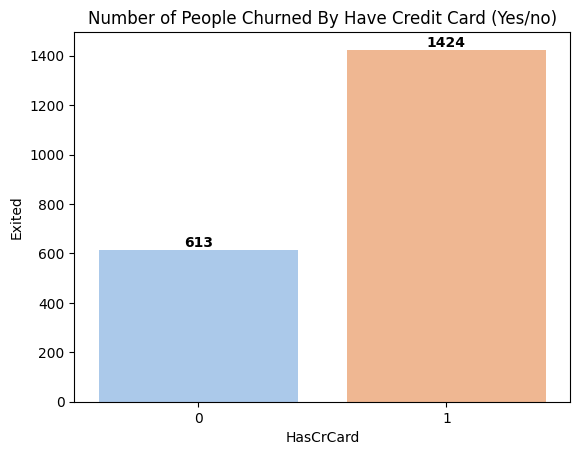

In [25]:
# conclusion =  people with more products are less likely to churn 

# Number of Products vs Exited
df_temp = df[df['Exited']==1]
people_by_geography = df_temp.groupby('HasCrCard')['Exited'].count().reset_index()
ax = sns.barplot(x='HasCrCard',y='Exited',data=people_by_geography,palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontweight='bold')
plt.title('Number of People Churned By Have Credit Card (Yes/no)')
ax

In [ ]:
# people with credit card churned more(maybe due to heavy debts)
# Number of Products vs Exited
df_temp = df[df['Exited']==1]
people_by_geography = df_temp.groupby('HasCrCard')['Exited'].count().reset_index()
ax = sns.barplot(x='HasCrCard',y='Exited',data=people_by_geography,palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontweight='bold')
plt.title('Number of People Churned By NumOfProducts')
ax

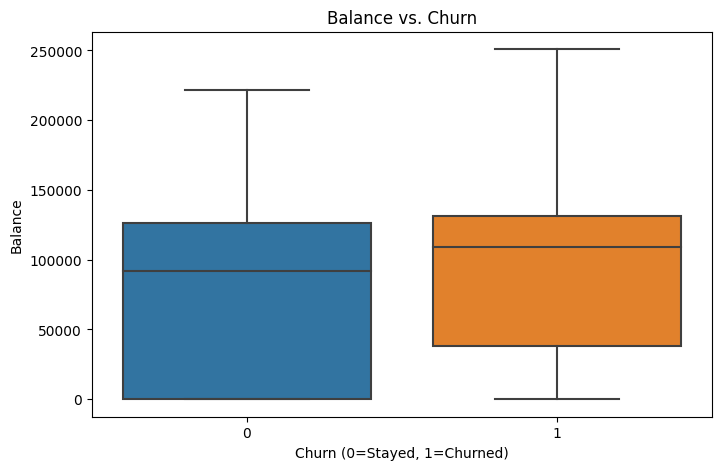

In [26]:
# Balance vs Churn - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs. Churn")
plt.xlabel("Churn (0=Stayed, 1=Churned)")
plt.ylabel("Balance")
plt.show()

/tmp/ipykernel_36/2128195470.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_churn = df.groupby('balance_bin')['Exited'].mean()


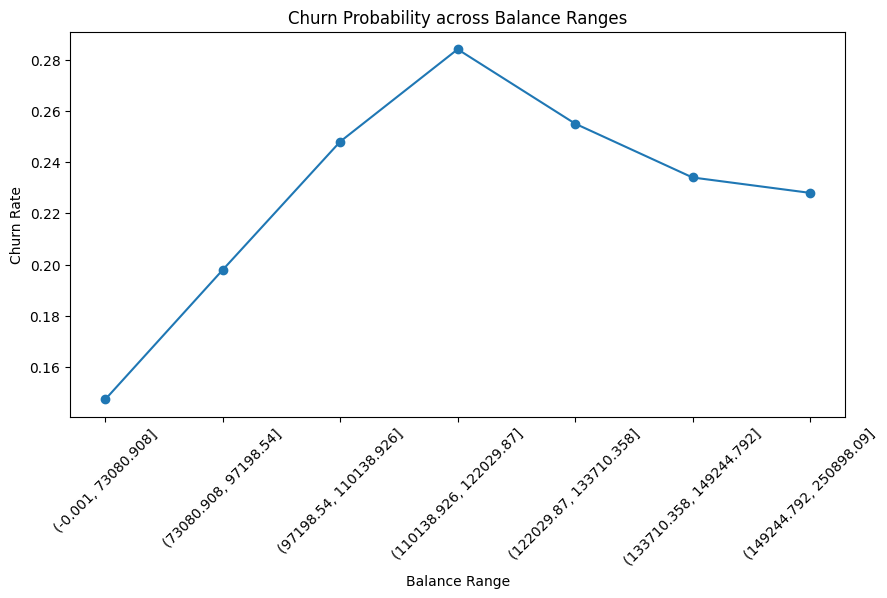

In [29]:
df['balance_bin'] = pd.qcut(df['Balance'], 10, duplicates='drop')
balance_churn = df.groupby('balance_bin')['Exited'].mean()

plt.figure(figsize=(10,5))
balance_churn.plot(marker='o')
plt.title("Churn Probability across Balance Ranges")
plt.ylabel("Churn Rate")
plt.xlabel("Balance Range")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# conclusion from above ( customers with balance range (97198,110138.926)) are more likely to churn 

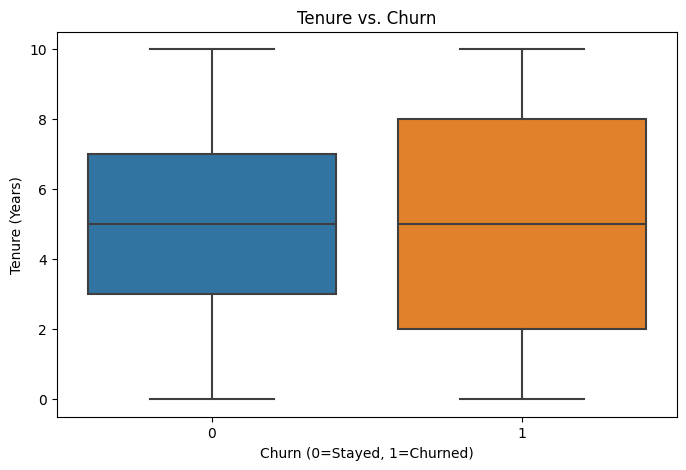

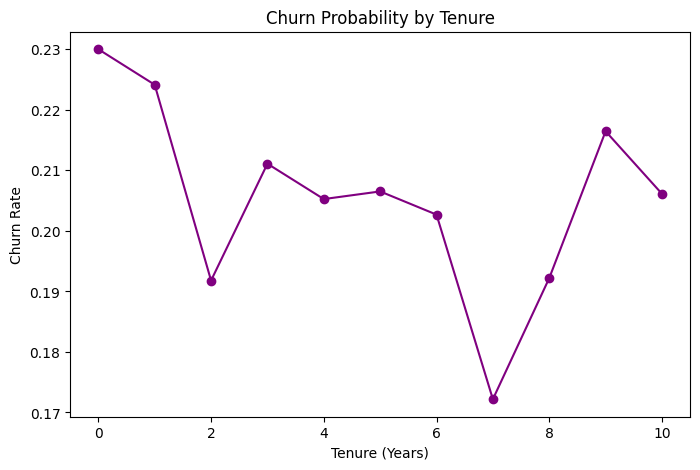

In [28]:
# Tenure vs Churn - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title("Tenure vs. Churn")
plt.xlabel("Churn (0=Stayed, 1=Churned)")
plt.ylabel("Tenure (Years)")
plt.show()

# Trend line
tenure_churn = df.groupby('Tenure')['Exited'].mean()

plt.figure(figsize=(8,5))
tenure_churn.plot(marker='o', color='purple')
plt.title("Churn Probability by Tenure")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure (Years)")
plt.show()


In [ ]:
# in 0 years churn probability is highest(0.23)(tenure vs churn) (likely due to no good customer loyalty)

# Recommended Actions to Reduce Customer Churn  

---

### **1. Balance Range (₹97k–₹110k)**  
- **Introduce** priority banking programs with relationship managers for mid-balance customers.  
- **Offer** exclusive investment products (e.g., mutual funds, fixed deposits with higher interest).  
- **Launch** personalized loyalty rewards for this segment.  

---

### **2. Tenure (0 Years = 23% Churn)**  
- **Strengthen** onboarding journey with welcome kits, guided mobile app setup, and first-month offers.  
- **Provide** early engagement calls from banking advisors.  
- **Offer** zero-fee accounts for the first year to encourage stickiness.  

---

### **3. Credit Card Customers**  
- **Implement** flexible repayment plans for high-debt customers.  
- **Introduce** debt counseling and financial wellness programs.  
- **Enhance** reward structures (cashback, travel miles, merchant discounts) to keep customers engaged.  

---

### **4. Multi-Product Ownership**  
- **Promote** cross-selling: bundle savings, credit card, and personal loans.  
- **Provide** loyalty points multipliers for customers holding 2+ products.  
- **Launch** “Banking Plus” packages with insurance or investment services for bundled customers.  

---

### **5. Geographic Churn Differences**  
- **Germany (highest churn):** Run targeted retention campaigns and customer satisfaction surveys to identify pain points.  
- **France & Spain:** Tailor localized offers (e.g., region-specific loan interest cuts, special savings products).  
- **Deploy** regional customer support teams for faster issue resolution.  

---
